In [ ]:
https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

Brief overview about the dataset:
This dataset is about titanic Dataset describing the survival status of individual passengers on the Titanic.
It has a total of 12 columns and ~ 900 rows 
Tasks:
Find out if there are any null values or not in the dataset. If yes calculate at a column level how many total null values are there
How will you handle the null values? Do you wish to drop or impute them? 
What is the total number of people on the ship who survived v/s not survived
How is the survival distribution spread across male and female categories?
Does their Age factor a major contribution to their survival factor or not?
Are there any outliers for Age?
Are there any outliers in Fare?
What does the overall Distribution For fare look like?
What is the min, mean and max age in the entire dataset looks like?
Identify the important features/columns from the dataset which gives most of the information in the entire dataset
Is there any specific preference/relation between age and fare price that they opted for?
How does Passenger Id and Name contribute to this data and the analysis we are drawing?
How does the distribution of Age look like for both the male and female category?


In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dt = pd.read_csv(r'C:\Users\DELL\Downloads\CDE10_GrowthSchool\Python\Basics\titanic.csv')


In [176]:
dt.shape

(891, 12)

In [178]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
dt.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [312]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [314]:
null_columns=dt.columns[dt.isnull().any()]
null_columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [170]:
dt.head(170)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S


In [182]:
#dt = dt.drop(columns=['Cabin'],inplace = True)
df = pd.DataFrame(dt)

In [186]:
df.drop(columns=['Cabin'], inplace=True)

In [190]:
df.head(13)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [196]:
df.shape


(891, 11)

In [198]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [216]:
df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [220]:
embmodeval = df['Embarked'].mode().values[0]
embmodeval

'S'

In [228]:
df['Embarked'].fillna(embmodeval,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: ylabel='Age'>

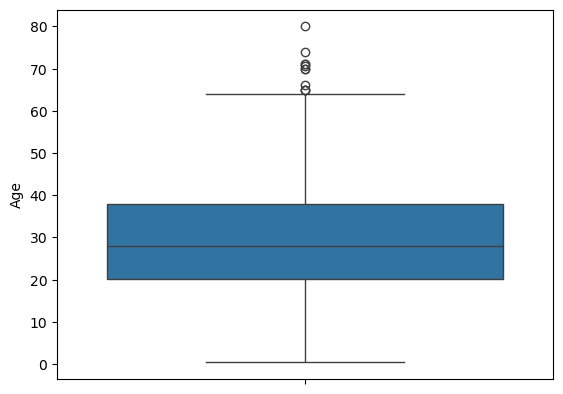

In [238]:
sns.boxplot(df['Age'])

In [254]:
q3 = df['Age'].quantile(0.75)
q3



38.0

In [256]:
q1 = dt['Age'].quantile(0.25)
q1


20.125

In [258]:
iqr = q3 - q1
iqr


17.875

In [260]:
lower_limit = q1 -(1.5*iqr)
lower_limit


-6.6875

In [262]:
upper_limit = q3 +(1.5*iqr)
upper_limit

64.8125

<Axes: >

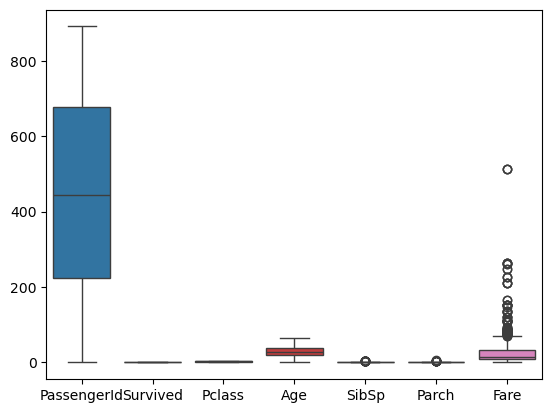

In [270]:
sns.boxplot(df[(df['Age'] > lower_limit)&(df['Age'] < upper_limit)])

In [274]:
df.shape

(891, 11)

In [278]:
df = df[(df['Age'] > lower_limit)&(df['Age'] < upper_limit)]

In [280]:
df.shape

(703, 11)

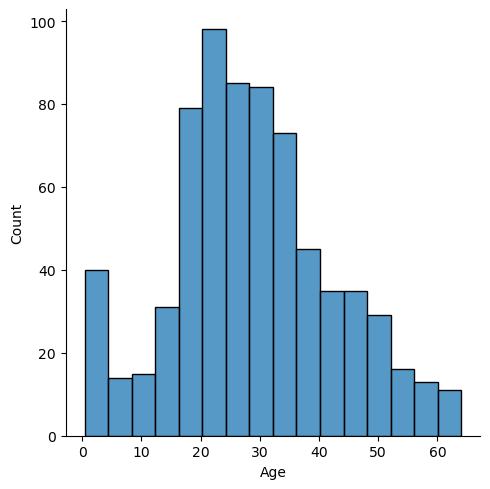

In [282]:
sns.displot(df['Age'])

In [290]:
df.duplicated().sum()

0

In [292]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  703 non-null    int64  
 1   Survived     703 non-null    int64  
 2   Pclass       703 non-null    int64  
 3   Name         703 non-null    object 
 4   Sex          703 non-null    object 
 5   Age          703 non-null    float64
 6   SibSp        703 non-null    int64  
 7   Parch        703 non-null    int64  
 8   Ticket       703 non-null    object 
 9   Fare         703 non-null    float64
 10  Embarked     703 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 65.9+ KB


In [316]:
df['Survived'].value_counts()

Survived
0    414
1    289
Name: count, dtype: int64

<Axes: xlabel='Survived'>

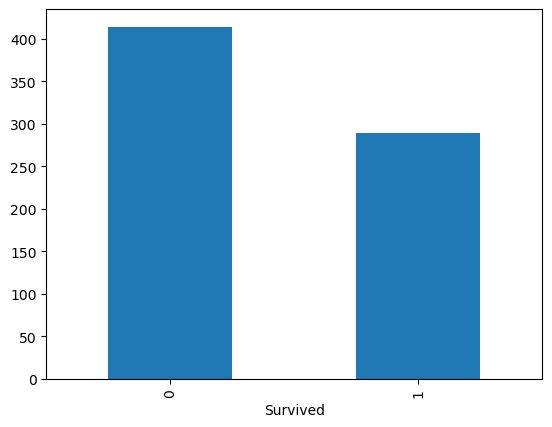

In [318]:
df['Survived'].value_counts().plot(kind="bar")

<Axes: xlabel='Survived'>

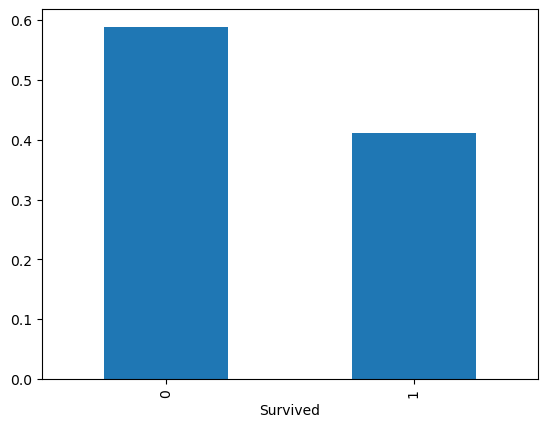

In [320]:
df['Survived'].value_counts(normalize=True).plot(kind="bar")

In [308]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,449.290185,0.411095,2.244666,29.072077,0.519203,0.435277,34.785093
std,258.604497,0.492383,0.835397,13.728478,0.934836,0.858015,53.255433
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.741700
75%,678.500000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,512.329200


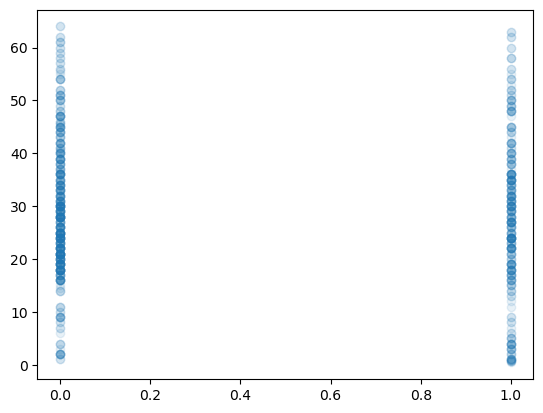

In [326]:
plt.scatter(df['Survived'], df['Age'], alpha=0.1)

In [334]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
12.00     1
0.67      1
36.50     1
0.42      1
34.50     1
Name: count, Length: 81, dtype: int64

In [336]:
df['Sex'].value_counts()

Sex
male      442
female    261
Name: count, dtype: int64

<Axes: xlabel='Sex'>

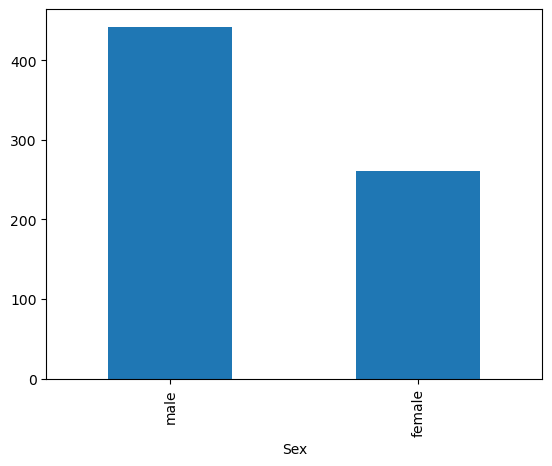

In [340]:
df['Sex'].value_counts().plot(kind="bar")

<Axes: xlabel='Sex'>

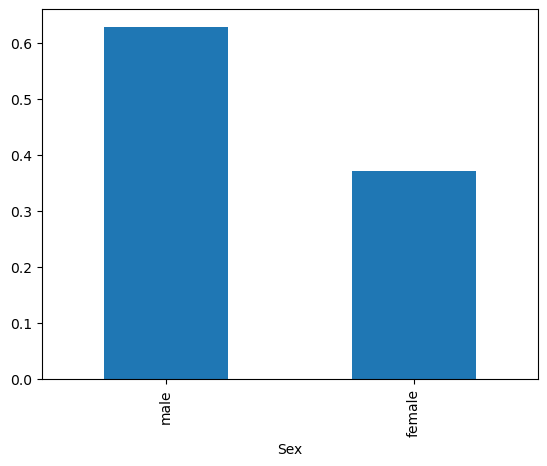

In [342]:
df['Sex'].value_counts(normalize=True).plot(kind="bar")